# Multivariate Analysis with Python: Factor Analysis 

> Here is the [link with more details.](https://www.datacamp.com/tutorial/introduction-factor-analysis)

> Performing factor analysis on categorical data. Here's a link with more [info](https://stats.oarc.ucla.edu/stata/faq/how-can-i-perform-a-factor-analysis-with-categorical-or-categorical-and-continuous-variables/)

> How to choose the number of factors in factor analysis [link](https://www.analyticsvidhya.com/blog/2020/10/dimensionality-reduction-using-factor-analysis-in-python/)

Factor Analysis (FA) is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. It helps in data interpretations by reducing the number of variables. It extracts maximum common variance from all variables and puts them into a common score.

Factor analysis is widely utilized in market research, advertising, psychology, finance, and operation research. Market researchers use factor analysis to identify price-sensitive customers, identify brand features that influence consumer choice, and helps in understanding channel selection criteria for the distribution channel.

We performing factor analysis, we make the following assumptions:

* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be perfect multicollinearity.
* There should not be homoscedasticity between the variables.




**Kinds of Factor Analysis**

There are broadly two kinds of factor analysis, Exploratory Factor Analysis (EFA) and Confirmatory Factor Analysis  (CFA). EFA is where the variables that are highly correlated to each other are grouped. This group is known as a ‘factor’. Once this factor is created, it looks for another set of variables and groups them, making another factor. The number of factors that are to be created depends on the analyst and N (number of observed variables) number of factors can be created (i.e. one factor for each observed variable). This N number is decided based on a number of factors.

CFA is used when we already have an idea about what the latent variables are and which of the observed variables belong to which latent variable. For example, we have ten variables where five of them seems to be related to education such as – How important formal studies are to you? Are you satisfied with the current method of examination etc while the other set of variables clearly seems to be dealing with sports such as How important sports are, how satisfied are you with the current situation of sports training? etc. Here we can easily guess that there seems to be two latent variables, however, to prove this statistically, we require to perform hypothesis testing and this is where CFA helps.

 **What is a factor?**

A factor is a latent variable which describes the association among the number of observed variables. The maximum number of factors are equal to a number of observed variables. Every factor explains a certain variance in observed variables. The factors with the lowest amount of variance were dropped. Factors are also known as latent variables or hidden variables or unobserved variables or Hypothetical variables.

**What are the factor loadings?**

The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables.

**What is Eigenvalues?**

Eigenvalues represent variance explained each factor from the total variance. It is also known as characteristic roots.

**What are Communalities?**

Commonalities are the sum of the squared loadings for each variable. It represents the common variance. It ranges from 0-1 and value close to 1 represents more variance.

**What is Factor Rotation?**

Rotation is a tool for better interpretation of factor analysis. Rotation can be orthogonal or oblique. It re-distributed the commonalities with a clear pattern of loadings.

**Choosing the Number of Factors**

Kaiser criterion is an analytical approach, which is based on the more significant proportion of variance explained by factor will be selected. The eigenvalue is a good criterion for determining the number of factors. Generally, an eigenvalue greater than 1 will be considered as selection criteria for the feature.

## Example 

In [ ]:
# Example 1
# ---
# Question 1: Perform Factor Analysis on BFI Dataset below
# ---
# Dataset url = http://bit.ly/BFI-Dataset
# Dataste info: http://bit.ly/BFI-Dataset-Info
# ---
#

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Step 1: Loading our Dataset
# 
df= pd.read_csv("http://bit.ly/BFI-Dataset")

In [ ]:
# Step 2: Previewing the dataset columns
# 
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [ ]:
# Step 3: Dropping unnecessary columns 
# 
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [ ]:
# Step 4: Dropping missing values rows
#
df.dropna(inplace=True)

In [ ]:
# Step 6: Checking the datatypes
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

In [ ]:
# Step 7: Previewing our dataset
# 
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [ ]:
# Step 8: Adequacy Test
# Before we perform factor analysis,weyou need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(18184.306307820552, 0.0)

In [ ]:
# Step 9:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# Value of KMO less than 0.6 is considered inadequate.
# 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)

# The overall KMO for our data is 0.84, which is excellent. 
# This value indicates that you can proceed with your planned factor analysis.

In [ ]:
# Step 10: Choosing the Number of Factors
# For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.
# 
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 25, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Here, we can see only for 6-factors eigenvalues are greater than one. 
# It means we need to choose only 6 factors (or unobserved variables).

,Original_Eigenvalues
0,5.134580
1,2.753375
2,2.148142
3,1.852506
4,1.548463
5,1.110662
6,0.980677
7,0.824309
8,0.795162
9,0.718290


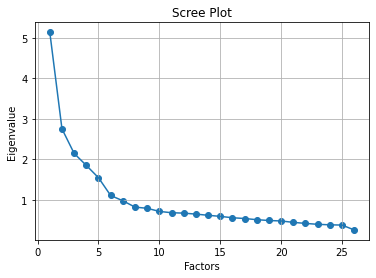

In [ ]:
# Step 11: 
# The scree plot method draws a straight line for each factor and its eigenvalues. 
# Number eigenvalues greater than one considered as the number of factors.

# Creating a scree plot using matplotlib
#
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Step 12: Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(df, 6, rotation="varimax")
fa.loadings

# We will note that
# Factor 1 has high factor loadings for E1,E2,E3,E4, and E5 (Extraversion)
# Factor 2 has high factor loadings for N1,N2,N3,N4, and N5 (Neuroticism)
# Factor 3 has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)
# Factor 4 has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)
# Factor 5 has high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)
# Factor 6 has none of the high loagings for any variable and is not easily interpretable. Its good if we take only five factors.

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Unnamed: 0,-0.032472,-0.022903,0.033169,0.003795,-0.038093,0.103748
A1,0.060474,0.099396,0.026694,-0.120309,-0.530785,0.163638
A2,0.259875,0.031767,0.140226,0.055770,0.646569,-0.097050
A3,0.408849,-0.005256,0.109534,0.016184,0.587004,0.039149
A4,0.255342,-0.079266,0.229308,-0.136293,0.391760,0.033401
A5,0.491049,-0.143645,0.085649,0.009111,0.451090,0.105888
C1,0.123647,0.005623,0.540150,0.183458,0.004221,0.138798
C2,0.106505,0.084358,0.652496,0.079203,0.056538,0.208580
C3,0.049796,-0.033946,0.545877,-0.012372,0.100286,0.054480
C4,0.008989,0.231617,-0.672785,-0.153451,-0.089980,0.226977


In [ ]:
# Step 13: Performing factor analysis for 5 factors
# 
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
Unnamed: 0,-0.061703,-0.019246,0.034865,0.014345,-0.018678
A1,0.030705,0.106455,0.027567,-0.074133,-0.429612
A2,0.227127,0.028693,0.141159,0.064117,0.621801
A3,0.329927,0.005335,0.115928,0.061647,0.642856
A4,0.209217,-0.069443,0.235418,-0.108647,0.431241
A5,0.397690,-0.129002,0.097901,0.075363,0.528159
C1,0.048297,0.009548,0.548276,0.212169,0.041194
C2,0.014459,0.089975,0.650304,0.116582,0.105693
C3,0.010825,-0.030243,0.555781,-0.004812,0.114165
C4,-0.039326,0.240794,-0.633576,-0.109695,-0.041462


In [ ]:
# Step 14: Getting variance of each factors
# 
fa.get_factor_variance()

# Noting total 42% cumulative Variance explained by the 5 factors.

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.428049,2.736109,2.082504,1.549502,1.800505
Proportion Var,0.093387,0.105235,0.080096,0.059596,0.069250
Cumulative Var,0.093387,0.198621,0.278718,0.338314,0.407564


**Pros and Cons of Factor Analysis**

Factor analysis explores large datasets and finds interlinked associations. It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables, which help the market researchers to compress the market situations and find the hidden relationship among consumer taste, preference, and cultural influence. Also, It helps in improve questionnaire in for future surveys. Factors make for more natural data interpretation.

Results of factor analysis are controversial. Its interpretations can be debatable because more than one interpretation can be made of the same data factors. After factor identification and naming of factors requires domain knowledge.

## <font color="green">Challenges</font>

In [ ]:
# Challenge 1
# ---
# Question: Perform factor analysis on the following dataset
# ---
# Dataset url = http://bit.ly/ZomatoDataset
# ---
# 
OUR CODE GOES HERE

In [ ]:
# Challenge 2
# ---
# Question: Perform factor analysis on the following dataset
# ---
# Dataset url = http://bit.ly/FIFADataset
# ---
#
OUR CODE GOES HERE

In [ ]:
# Challenge 3
# ---
# Question: Perform factor analysis on the following dataset
# ---
# Dataset url = http://bit.ly/StudentsAlcoholGradesDataset
# Dataset info = http://bit.ly/StudentsAlcoholGradesDatasetInfo
#
OUR CODE GOES HERE